In [1]:
import pandas as pd
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
import copy, math
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('motion.csv')
df

,motion_1,motion_2,motion_3,motion_4,motion_5,motion_6,pose
0,0.380623,0.422222,0.520505,0.391463,0.555705,0.546592,0
1,0.531719,0.397661,0.499474,0.448780,0.445638,0.400556,0
2,0.453287,0.380117,0.545741,0.446341,0.500671,0.347705,1
3,0.402537,0.425731,0.372240,0.478049,0.616107,0.534075,0
4,0.388697,0.191813,0.332282,0.245122,0.373154,0.221140,0
...,...,...,...,...,...,...,...
4645,0.442907,0.431579,0.537329,0.484146,0.571812,0.183588,1
4646,0.350634,0.447953,0.543638,0.534146,0.416107,0.550765,0
4647,0.522491,0.447953,0.595163,0.408537,0.445638,0.485396,1
4648,0.534025,0.417544,0.465825,0.429268,0.421477,0.502086,1


In [3]:
x = df.drop(['pose'], axis=1).values
y = df['pose'].values

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [5]:
def compute_loss(x, y, w):
    d = x.shape[0]
    loss = 0
    for i in range(d): 
        loss += (sigmoid(np.dot(x[i],w))-y[i])**2
    loss = loss / d
    return loss

In [6]:
def compute_gradient(x, y, w):
    d = x.shape[0]
    dw = 0 
    for i in range(d):
        dw += 2*(sigmoid(np.dot(x[i],w))-y[i])*sigmoid(np.dot(x[i],w))*(1-sigmoid(np.dot(x[i],w)))*x[i]
    dw = dw/d
    return dw

In [7]:
def gradient_descent(x, y, w, lr, iters): 
    loss = []
    for i in range(iters):
        dw = compute_gradient(x, y, w)   
        w = w - lr * dw               
        loss.append(compute_loss(x, y, w))
    return w,loss

In [8]:
w  = np.zeros(len(x[0]))
w, l1 = gradient_descent(x, y, w, 0.01, 1000) 
print(w)

[-0.00232326 -0.00186073  0.00179874  0.00528452  0.0048699   0.00414474]


In [9]:
w  = np.random.rand(len(x[0]))
w, l2 = gradient_descent(x, y, w, 0.01, 1000) 
print(w)

[ 0.1750207   0.31578443  0.46750486  0.17376839  0.48496962 -0.02660452]


In [10]:
iterations = np.arange(1000)

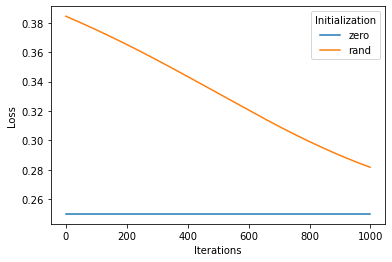

In [11]:
plt.plot(iterations, l1)
plt.plot(iterations, l2)
plt.legend(['zero','rand'],title='Initialization')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [12]:
w  = np.zeros(len(x[0]))
w, l1 = gradient_descent(x, y, w, 0.1, 1000) 
print(w)

[-0.03954079 -0.03334567 -0.0010518   0.03690955  0.03107876  0.02559311]


In [13]:
w  = np.zeros(len(x[0]))
w, l2 = gradient_descent(x, y, w, 0.05, 1000) 
print(w)

[-0.05962605 -0.05041046 -0.00296249  0.05352919  0.04483229  0.03684745]


In [14]:
w  = np.zeros(len(x[0]))
w, l3 = gradient_descent(x, y, w, 0.01, 1000) 
print(w)

[-0.00232326 -0.00186073  0.00179874  0.00528452  0.0048699   0.00414474]


In [15]:
w  = np.zeros(len(x[0]))
w, l4 = gradient_descent(x, y, w, 0.005, 1000) 
print(w)

[-0.00079042 -0.00059765  0.00130703  0.00296652  0.00279968  0.00240219]


In [16]:
w  = np.zeros(len(x[0]))
w, l5 = gradient_descent(x, y, w, 0.001, 1000) 
print(w)

[-6.60642664e-05 -3.70877890e-05  3.62139340e-04  6.73205949e-04
  6.49897620e-04  5.61811167e-04]


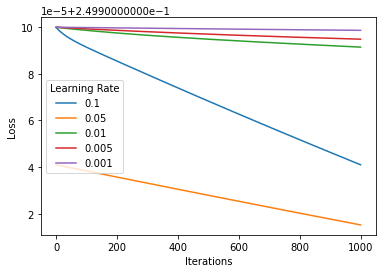

In [17]:
plt.plot(iterations, l1)
plt.plot(iterations, l2)
plt.plot(iterations, l3)
plt.plot(iterations, l4)
plt.plot(iterations, l5)
plt.legend(['0.1','0.05','0.01','0.005','0.001'],title='Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [20]:
w  = np.zeros(len(x[0]))
w, l = gradient_descent(x_train, y_train, w, 0.05, 2000) 
print(w)

[-0.04737066 -0.06199468  0.0254091   0.04083541 -0.01483128  0.01284657]


In [21]:
def pred(x, w):
    preds = []
    for i in range(len(x)):
        if (sigmoid(np.dot(x[i],w))>=0.5):
            preds.append(1)
        else:
            preds.append(0)
    return preds

In [31]:
y_preds = np.array(pred(x_test, w))

In [32]:
accuracy_score(y_test, y_preds)

0.5878136200716846